In [ ]:
%load_ext autoreload
%autoreload 2

import os
from os.path import realpath
NBROOT = realpath(os.curdir)

import logging
logging.basicConfig(level=logging.DEBUG)

import sys
sys.path.append(realpath('..'))
sys.path.append(realpath('../../eslope/development/src'))

In [ ]:
%pip install mercantile

In [ ]:
# Preamble

import logging
logging.basicConfig(level=logging.DEBUG)
logging.getLogger('PIL').level = logging.INFO # PIL.PngImagePlugin

import os
from os.path import exists, join as pjoin
from pathlib import Path
from time import time
from urllib.error import HTTPError
from urllib.request import urlopen, urlretrieve

#external
from IPython.display import display, Image
from PIL import Image as Img
import mercantile as T

#own
import mbt_util as M
import bbox
from src import img_util as G, mbt_download as MD, mbt_partial as MP, swisstopo as SW

In [ ]:
def tree():
    """Return a tree of tuples representing the logger layout.
    Each tuple looks like ``('logger-name', <Logger>, [...])`` where the
    third element is a list of zero or more child tuples that share the
    same layout.
    """
    root = ('', logging.root, [])
    nodes = {}
    items = list(logging.root.manager.loggerDict.items())  # for Python 2 and 3
    items.sort()
    for name, logger in items:
        nodes[name] = node = (name, logger, [])
        i = name.rfind('.', 0, len(name) - 1)  # same formula used in `logging`
        if i == -1:
            parent = root
        else:
            parent = nodes[name[:i]]
        parent[2].append(node)
    return root

tree()

('',
 <RootLogger root (DEBUG)>,
 [('IPKernelApp', <Logger IPKernelApp (WARNING)>, []),
  ('PIL', <Logger PIL (INFO)>, [('PIL.Image', <Logger PIL.Image (INFO)>, [])]),
  ('asyncio', <Logger asyncio (DEBUG)>, []),
  ('concurrent',
   [('concurrent.futures', <Logger concurrent.futures (DEBUG)>, [])]),
  ('parso',
   [('parso.cache', <Logger parso.cache (DEBUG)>, []),
    ('parso.python',
     [('parso.python.diff', <Logger parso.python.diff (DEBUG)>, [])])]),
  ('prompt_toolkit',
   [('prompt_toolkit.buffer', <Logger prompt_toolkit.buffer (DEBUG)>, [])]),
  ('tornado',
   <Logger tornado (DEBUG)>,
   [('tornado.access', <Logger tornado.access (DEBUG)>, []),
    ('tornado.application', <Logger tornado.application (DEBUG)>, []),
    ('tornado.general', <Logger tornado.general (DEBUG)>, [])])])

In [ ]:
cdir = 'geo/data/sample_ch'
os.makedirs(cdir, exist_ok=True)
%cd $cdir

/home/me/code/eddy-geek/TIL/geo/data/sample_ch


[data.geo.admin.ch](https://data.geo.admin.ch/)
```
ch.swisstopo.pixelkarte-farbe-pk25.noscale
ch.swisstopo.pixelkarte-farbe-pk50.noscale
ch.swisstopo.pixelkarte-farbe-pk100.noscale 
ch.swisstopo.pixelkarte-farbe-pk200.noscale 
ch.swisstopo.pixelkarte-farbe-pk500.noscale
ch.swisstopo.pixelkarte-farbe-pk1000.noscale
```

In [ ]:
#Get dataset extent
#https://gis.stackexchange.com/questions/57834/how-to-get-raster-corner-coordinates-using-python-gdal-bindings

In [ ]:
# def img(z, x, y):
#     return 

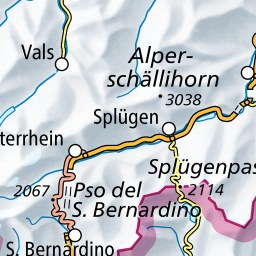

In [ ]:
# LV95 (swiss projection) WMTS
Image(urlopen('https://wmts100.geo.admin.ch/1.0.0/ch.swisstopo.pixelkarte-farbe/default/current/2056/17/12/7.jpeg').read())

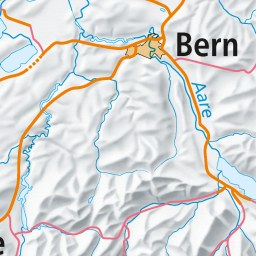

In [ ]:
# PseudoMercator (MbTiles compatible) WMTS
Image(urlopen('https://wmts.geo.admin.ch/1.0.0/ch.swisstopo.pixelkarte-farbe/default/current/3857/9/266/180.jpeg').read())

We need to use EPSG:3857 WebMercator
luckily swisstopo WMTS supports it: [geo.admin.ch](https://www.geo.admin.ch/en/geo-services/geo-services/portrayal-services-web-mapping/web-map-tiling-services-wmts.html)

https://wmts.geo.admin.ch/1.0.0/ch.swisstopo.pixelkarte-farbe/default/current/3857/{TileMatrix}/{TileCol}/{TileRow}.jpeg"/>
with TileMatrixSet 3857_19 ie up to z=19


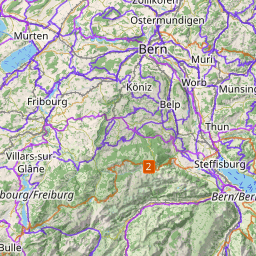

In [ ]:
Image(urlopen('https://c.tile-cyclosm.openstreetmap.fr/cyclosm/9/266/180.png').read())

## Example with Zmutt (Zermatt)


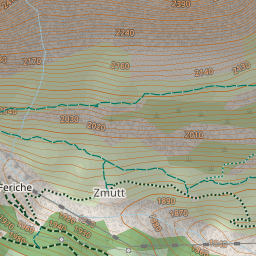

In [ ]:
# CyclOSM map (Slippy Map / xyz scheme)
Image(urlopen('https://c.tile-cyclosm.openstreetmap.fr/cyclosm/15/17086/11656.png').read())

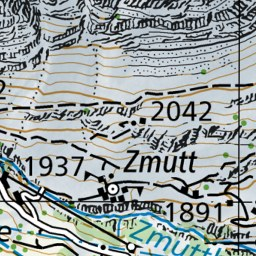

In [ ]:

Image(urlopen('https://wmts100.geo.admin.ch/1.0.0/ch.swisstopo.pixelkarte-farbe/default/current/3857/15/17086/11656.jpeg').read(), height=256)

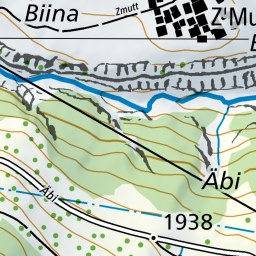

In [ ]:
Image(urlopen('https://wmts100.geo.admin.ch/1.0.0/ch.swisstopo.pixelkarte-farbe/default/current/3857/17/68345/46627.jpeg').read(), height=256)

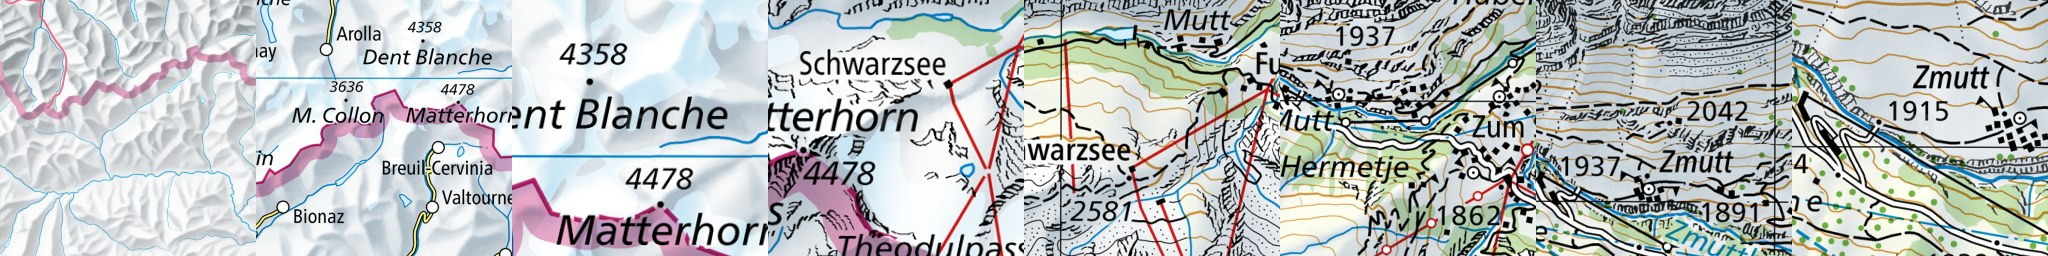

In [ ]:
!mkdir -p tiles

zmutt_seed = ('zmutt', 17,68345,46627)
# D, Z, X, Y = zmutt_seed
# tileset = 'pixelkarte-farbe'

imgsa = G.tile_pyramid_url(f'zmutt_pixelkarte-farbe.jpeg', bbox.llzmutt,
                         get_url=SW.ch_url('pixelkarte-farbe', 'jpeg'))
Image(imgsa[0])

Let's try to have the same as the generic (web) pixelkarte above, but by using each of the dedicated layers from 1:10 000 to 1:1 000 000

unfortunately there seems to be no downscaled version of the 1:1million overview

let's try to see if we can get downscaled version  of the others:

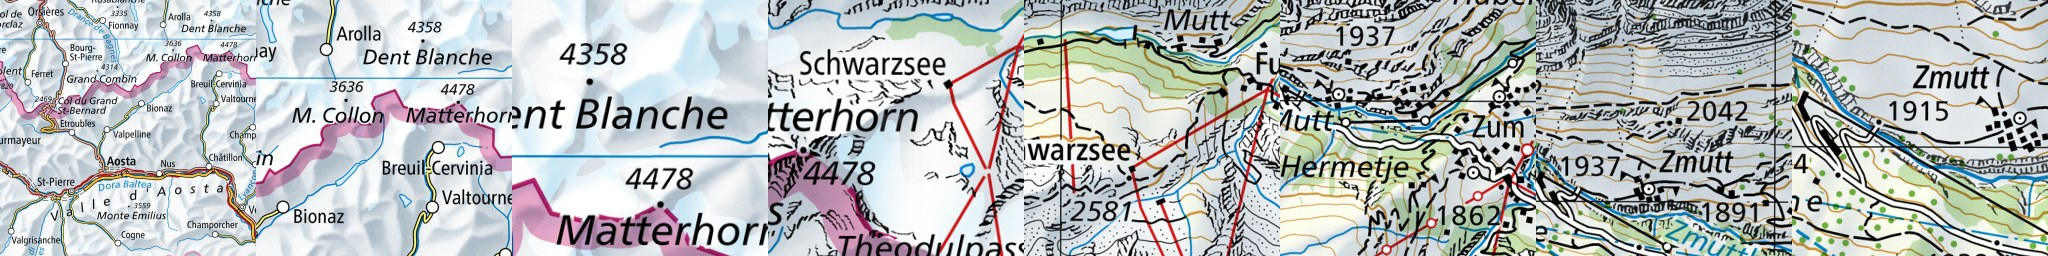

In [ ]:
#           [...9,         10,   11,  12,  13,  14, 15, 16, 17]
tilescale = [1000]*10 + [1000, 1000, 500, 200, 100, 50, 25, 10]

imgsb = G.tile_pyramid_url('zmutt_swisstopo_imitation.jpeg', bbox.llzmutt,
                         get_url=lambda z, x, y: SW.ch_url(*SW.scale2tileset(tilescale[z]))(z, x, y))
Image(imgsb[0])

DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'PLTE' 41 768
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 821 26919
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'PLTE' 41 768
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 821 26114
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'PLTE' 41 768
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 821 32768
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'PLTE' 41 762
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 815 32768
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'PLTE' 41 765
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 818 32768
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'PLTE' 41 768
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 821 32768
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'PLTE' 41 768
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 821 32768

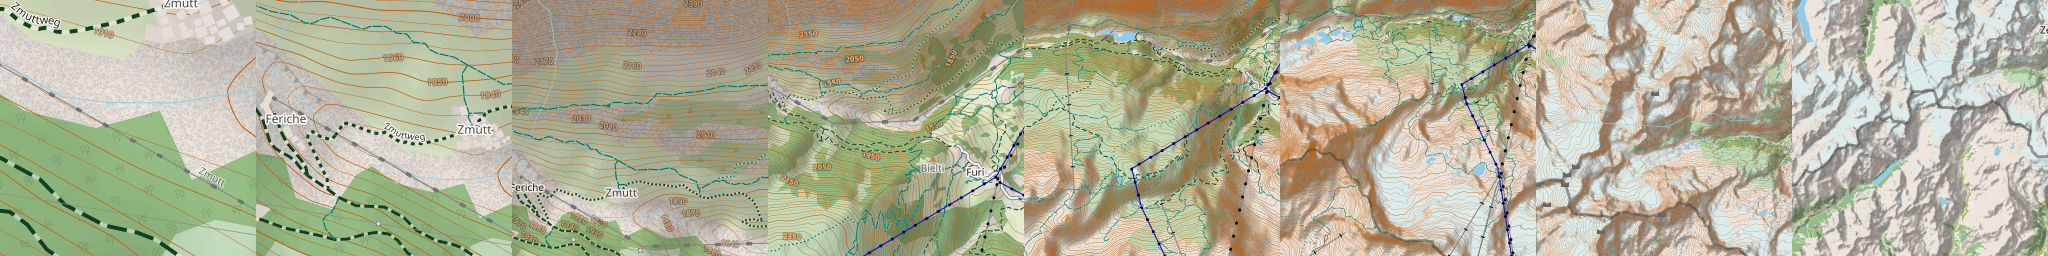

In [ ]:

imgsc= G.tile_pyramid_url('zmutt_swisstopo_imitation.jpeg', bbox.llzmutt,
                          get_url=lambda z, x, y: f'https://c.tile-cyclosm.openstreetmap.fr/cyclosm/{z}/{x}/{y}.png')
Image(imgsc[0])